In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize  # You may need to install nltk: pip install nltk
# Download the Punkt tokenizer model
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
data_path = "/content/drive/MyDrive/OPIM_5671_Data_Mining/Text_Mining_Project/Data/"

In [18]:
fake_news_df = pd.read_csv(data_path + 'Fake.csv', encoding='utf-8')
true_news_df = pd.read_csv(data_path + 'True.csv', encoding='utf-8')

In [19]:
fake_news_df.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [20]:
fake_news_df['Target_IsFake'] = 1
true_news_df['Target_IsFake'] = 0

In [21]:
# import chardet

# # Detect the encoding
# with open(data_path + 'Fake.csv', 'rb') as file:
#     print(chardet.detect(file.read()))

In [22]:
df = pd.concat([fake_news_df, true_news_df], ignore_index=True)

In [23]:
df['Target_IsFake'].value_counts()

1    23481
0    21417
Name: Target_IsFake, dtype: int64

In [24]:
df.iloc[832]['title']

' Are Trump Supporters Too Dumb To Know They’re Dumb? Science Says “Probably”'

## Data Exploration

### Word Cloud Analysis for Fake vs Real News

In [25]:
fake_df = df[df['Target_IsFake']==1]
true_df = df[df['Target_IsFake']==0]

### Word Clouds of Title

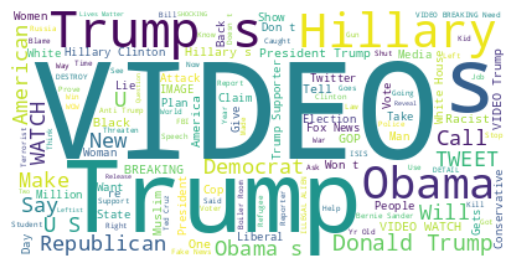

In [26]:
# https://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-auto-examples-simple-py

wordcloud = WordCloud(background_color='white').generate(' '.join(fake_df['title']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

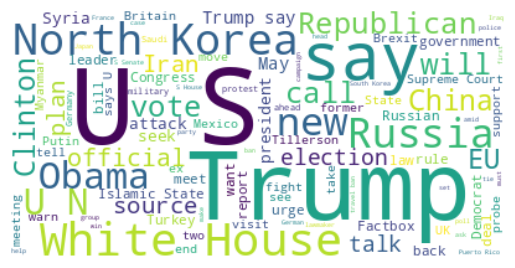

In [27]:
wordcloud = WordCloud(background_color='white').generate(' '.join(true_df['title']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word Clouds of Text

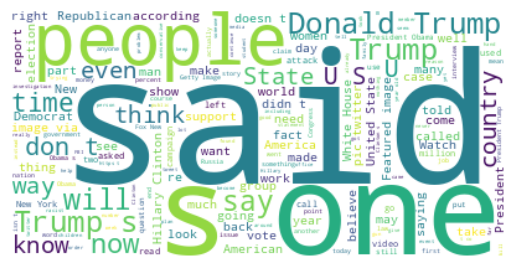

In [28]:
wordcloud = WordCloud(background_color='white').generate(' '.join(fake_df['text']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

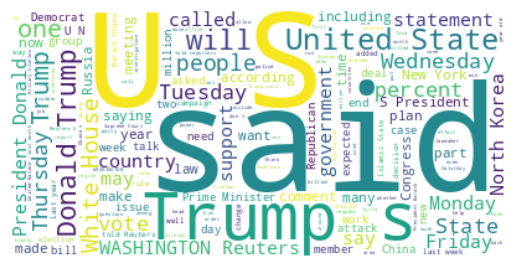

In [29]:
wordcloud = WordCloud(background_color='white').generate(' '.join(true_df['text']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Word Count of Fake vs Real

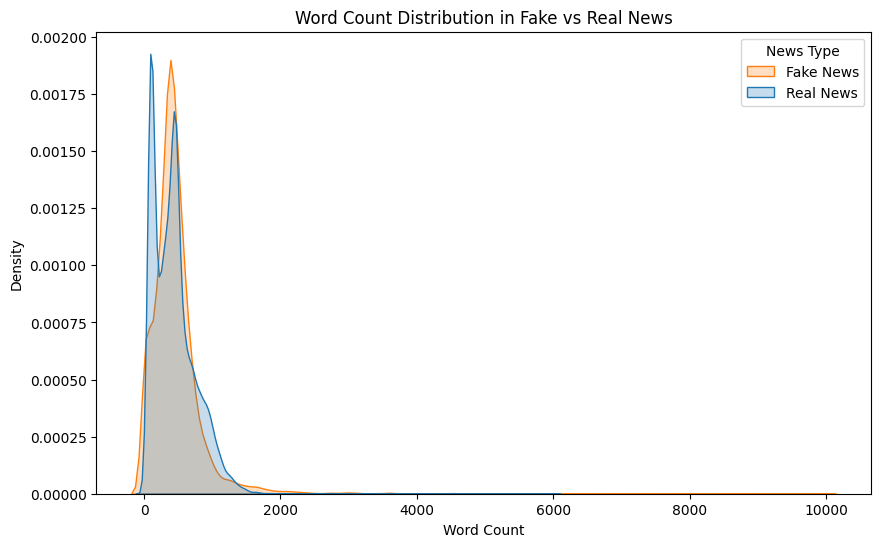

In [37]:
# Tokenize the text and calculate word counts for each category
df['word_count'] = df['text'].apply(lambda x: len(word_tokenize(x)))

# Plotting
plt.figure(figsize=(10, 6))
# sns.histplot(data=df, x='word_count', hue='Target_IsFake', element="step", common_norm=False, stat="density", kde=True)
sns.kdeplot(data=df, x='word_count', hue='Target_IsFake', fill=True, common_norm=False)
plt.title('Word Count Distribution in Fake vs Real News')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend(title='News Type', labels=['Fake News', 'Real News'])
plt.show()

### Target Class Distribution

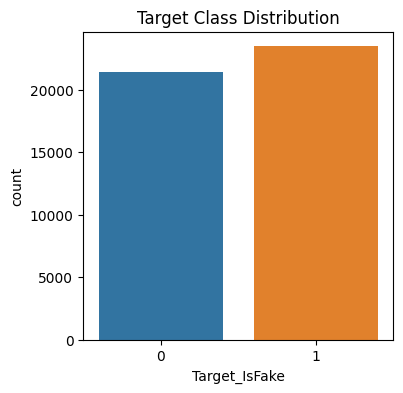

In [44]:
# Plot the target class distribution
plt.figure(figsize=(4, 4))
sns.countplot(x='Target_IsFake', data=df)
plt.title('Target Class Distribution')
plt.show()

In [ ]:
df.shape

(44898, 5)

In [ ]:
!pip install openpyxl


In [ ]:
# df.to_csv(data_path + 'Dataset.csv', encoding='utf-8', index=False)
df.to_excel(data_path + 'Dataset.xlsx', engine='openpyxl', index=False)